# Week 2

In [139]:
from Algs_scratch import *

In [140]:
def func_x(x):
    return - x**5 - 2*x + 1

In [141]:
%%time
bisection(-2, 2, func_x)


CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 15.7 µs


In [142]:
%%time
secant_method(func_x, 0, 0.2)

CPU times: user 28 µs, sys: 0 ns, total: 28 µs
Wall time: 31 µs


(0.486389035934543, 6)

In [143]:
%%time
Newton_Raphson(func_x, 0.2)

CPU times: user 21 µs, sys: 1e+03 ns, total: 22 µs
Wall time: 25.3 µs


(0.4863890252475381, 8)

# Week 3

## bruteforce or scipy.optimize

In [144]:
import numpy as np
import scipy.optimize as opt
from scipy.optimize import minimize


In [145]:
def f(x):
    return x**6 - x**5 + x**4 - 7*x**3 + x**2 + x -5

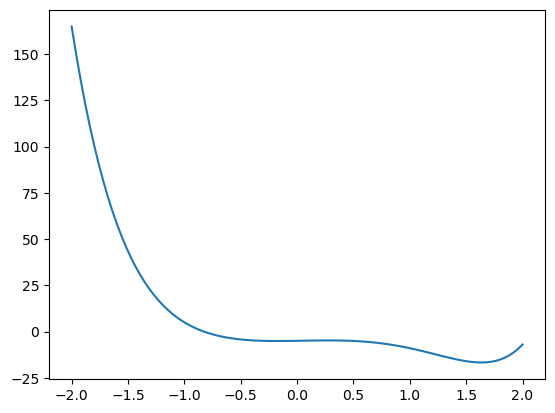

In [146]:
def matplotlib_display():
    import matplotlib.pyplot as plt 
    x = np.linspace(-2, 2, 100)
    plt.plot(x, f(x))
    plt.show()
matplotlib_display()

In [147]:
minfx = minimize(f, 0, method='BFGS', options={'disp': True})
minimizescalar = opt.minimize_scalar(f, method='brent')
print(minfx)


Optimization terminated successfully.
         Current function value: -5.105749
         Iterations: 5
         Function evaluations: 14
         Gradient evaluations: 7
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -5.105749483553248
        x: [-1.729e-01]
      nit: 5
      jac: [-5.960e-08]
 hess_inv: [[ 1.024e-01]]
     nfev: 14
     njev: 7


In [148]:
%%time
def df(x):
    return 6*x**5 - 5*x**4 + 4*x**3 - 21*x**2 + 2*x + 1
    
minfx = opt.root_scalar(df, method='newton', x0=1.4)
print(f"""
    Newton-Raphson: 
    {minfx}
    """)


    Newton-Raphson: 
          converged: True
           flag: converged
 function_calls: 14
     iterations: 7
           root: 1.6351292084233693
    
CPU times: user 1.74 ms, sys: 3.63 ms, total: 5.37 ms
Wall time: 4.98 ms


In [149]:
def get_derivative_f(x, func, tol=1e-6):
    return (func(x + tol) - func(x-tol)) / (2*tol)


In [150]:
%%time
def BruteForce(func, range, steps, tol=1e-6):
    x = np.linspace(range[0], range[1], steps)
    y = func(x)
    min_index = np.argmin(y)
    max_index = np.argmax(y)
    x_min = x[min_index]
    x_max = x[max_index]
    return {
        'min': {
            'x': x_min,
            'y': y[min_index]
        },
        'max': {
            'x': x_max,
            'y': y[max_index]
        }
    }

BruteForce(f, [-10,10], 1000)

CPU times: user 4.08 ms, sys: 294 µs, total: 4.38 ms
Wall time: 2.76 ms


{'min': {'x': 1.631631631631631, 'y': -16.720848456833032},
 'max': {'x': -10.0, 'y': 1117085.0}}

## x = [x1,x2]

$$
x \in \left[ 0, 1 \right]^2
$$

In [151]:
A = np.random.rand(2,2)
C = np.random.rand(2,1)
D = np.random.rand(1,1)
print(A)
print(C)
print(D)
X = np.random.rand(2,1)

[[0.27459855 0.30119943]
 [0.12312308 0.90722738]]
[[0.3310752 ]
 [0.26119596]]
[[0.40791828]]


In [152]:
def f(x):
    return x.T @ A @ x + C.T @ x + D

def test():
    x=np.random.rand(2,1)
    return x, f(x)

def df(x, tol=1e-6):
    return ((f(x + tol) - f(x-tol)) / (2*tol))
df(X).shape

(1, 1)

In [153]:
import scipy.misc as misc
misc.derivative(f, X)

/tmp/ipykernel_5256/432769170.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  misc.derivative(f, X)


array([[1.85963931]])

In [154]:
minfx = opt.minimize(f, X.reshape(-1), method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.308117
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7


# Week4

## find f'

In [164]:
n = np.random.randint(1, 10)
n


8

In [165]:
params = np.random.rand(n)
params

array([0.92841275, 0.73851291, 0.85737715, 0.5924553 , 0.15742715,
       0.40741475, 0.57894832, 0.43392129])

In [166]:
coordinates = []
for i in range(n):
    # Create an coordinate
    x = np.random.randint(0,10) 
    y = np.random.randint(0,10)
    coordinates.append((x,y))
coordinates
coordinates = np.array(coordinates)
coordinates

array([[9, 0],
       [2, 5],
       [6, 0],
       [5, 7],
       [2, 9],
       [1, 4],
       [1, 2],
       [7, 2]])

[ 5.52003708e+05 -1.13276441e+06  7.88230996e+05 -2.37512256e+05
  3.10474591e+04 -8.58325131e+02 -1.54181873e+02  1.00067615e+01]


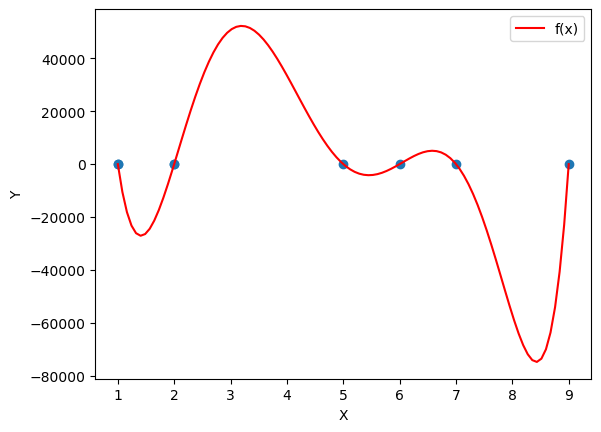

In [167]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = coordinates[:, 0]
y = coordinates[:, 1]

def target_function(x, *params):
    # result_f = 0
    # for i in range(len(params)):
    #     result_f += params[i] * x**i
    return sum([params[i] * x**i for i in range(len(params))])

fit_params, pcov = curve_fit(target_function, x, y, p0=params.tolist())
print(fit_params)

x_new = np.linspace(min(x), max(x), 100)

y_new = target_function(x_new, *fit_params)

plt.scatter(x, y)
plt.plot(x_new, y_new, label='f(x)', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [159]:
def df(x, tol = 1e-6):
    return ((target_function((x + tol), *fit_params) - target_function((x-tol), *fit_params)) / (2*tol))

In [160]:
df(1)

-1.3074074072250141